<a href="https://colab.research.google.com/github/apester/IME/blob/main/CNN_vs_Dense_Lab_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: CNN vs Dense Networks on MNIST and CIFAR-10

This notebook illustrates the advantages of CNNs compared to dense neural networks using MNIST and CIFAR-10 datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

## MNIST Dataset Comparison

In [2]:
# MNIST data preprocessing
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train_cat, y_test_cat = to_categorical(y_train), to_categorical(y_test)
x_train_cnn, x_test_cnn = x_train[..., np.newaxis], x_test[..., np.newaxis]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
dense_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

dense_history = dense_model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8157 - loss: 0.6509 - val_accuracy: 0.9575 - val_loss: 0.1457
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9568 - loss: 0.1456 - val_accuracy: 0.9685 - val_loss: 0.1087
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9712 - loss: 0.0957 - val_accuracy: 0.9725 - val_loss: 0.0953
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9776 - loss: 0.0725 - val_accuracy: 0.9777 - val_loss: 0.0795
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9830 - loss: 0.0568 - val_accuracy: 0.9757 - val_loss: 0.0844


In [5]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train_cnn, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 88ms/step - accuracy: 0.8321 - loss: 0.6082 - val_accuracy: 0.9795 - val_loss: 0.0767
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 89ms/step - accuracy: 0.9783 - loss: 0.0727 - val_accuracy: 0.9843 - val_loss: 0.0569
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9848 - loss: 0.0497 - val_accuracy: 0.9872 - val_loss: 0.0464
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.9884 - loss: 0.0395 - val_accuracy: 0.9858 - val_loss: 0.0482
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9909 - loss: 0.0278 - val_accuracy: 0.9890 - val_loss: 0.0416


In [6]:
dense_loss, dense_acc = dense_model.evaluate(x_test, y_test_cat, verbose=0)
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test_cat, verbose=0)

print(f"Dense Test Accuracy: {dense_acc:.4f}")
print(f"CNN Test Accuracy: {cnn_acc:.4f}")


Dense Test Accuracy: 0.9727
CNN Test Accuracy: 0.9876


In [7]:
dense_model.summary()
cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

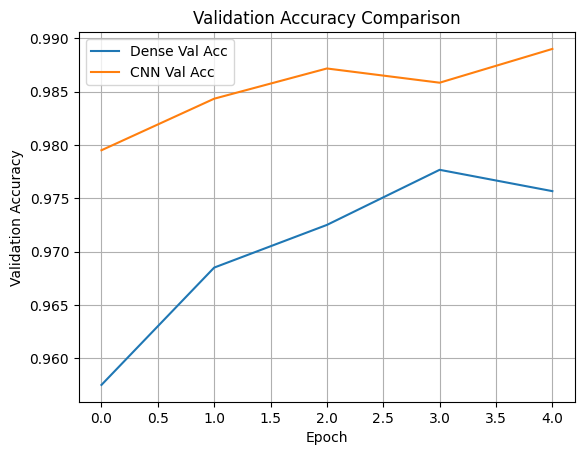

In [8]:
plt.plot(dense_history.history['val_accuracy'], label='Dense Val Acc')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy Comparison')
plt.grid(True)
plt.show()


# Extension Task: Apply CNN vs Dense on CIFAR-10

In [12]:
# CIFAR-10 Comparison: CNN vs Dense Network
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [13]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [14]:
# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [15]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [16]:
# Dense Network Model
dense_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# Train Dense Network
history_dense = dense_model.fit(
    x_train, y_train_cat,
    epochs=10, batch_size=128,
    validation_split=0.1
)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.2581 - loss: 2.1792 - val_accuracy: 0.3576 - val_loss: 1.7804
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.3827 - loss: 1.7263 - val_accuracy: 0.4204 - val_loss: 1.6482
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.4200 - loss: 1.6321 - val_accuracy: 0.4356 - val_loss: 1.5996
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.4369 - loss: 1.5764 - val_accuracy: 0.4422 - val_loss: 1.5572
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.4564 - loss: 1.5133 - val_accuracy: 0.4380 - val_loss: 1.5629
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.4718 - loss: 1.4780 - val_accuracy: 0.4656 - val_loss: 1.5062
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.4810 - loss: 1.4529 - val_accuracy: 0.4652 - val_loss: 1.4978
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.5004 - loss: 1.4200 - 

In [18]:
# Evaluate Dense Network
dense_test_loss, dense_test_acc = dense_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Dense Network Test Accuracy: {dense_test_acc:.4f}")

Dense Network Test Accuracy: 0.4923


In [19]:
# CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train CNN
history_cnn = cnn_model.fit(
    x_train, y_train_cat,
    epochs=10, batch_size=128,
    validation_split=0.1
)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 51s 139ms/step - accuracy: 0.3475 - loss: 1.7896 - val_accuracy: 0.5602 - val_loss: 1.2779
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 48s 135ms/step - accuracy: 0.5589 - loss: 1.2510 - val_accuracy: 0.6156 - val_loss: 1.1137
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 81s 134ms/step - accuracy: 0.6155 - loss: 1.1009 - val_accuracy: 0.6300 - val_loss: 1.0660
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 47s 134ms/step - accuracy: 0.6551 - loss: 0.9927 - val_accuracy: 0.6516 - val_loss: 0.9959
Epoch 5/10
343/352 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.6785 - loss: 0.9285

In [ ]:
# Evaluate CNN
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")

In [ ]:
# Plot Validation Accuracy Comparison
plt.plot(history_dense.history['val_accuracy'], label='Dense Val Acc')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('CNN vs Dense Network on CIFAR-10')
plt.legend()
plt.grid(True)
plt.show()

# Print Parameter Counts
print("\nDense Network Summary:")
dense_model.summary()

print("\nCNN Model Summary:")
cnn_model.summary()


In [ ]:
# Print Parameter Counts
print("\nDense Network Summary:")
dense_model.summary()

print("\nCNN Model Summary:")
cnn_model.summary()